In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import pickle
from skimage.transform import rescale, rotate
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [15, 5]
import sys
sys.path.insert(1, os.getcwd()+"/../..") # Not needed if you installed SyMBac using pip
from SyMBac.drawing import raster_cell
from SyMBac.colony_simulation import ColonySimulation
from SyMBac.colony_renderer import ColonyRenderer, SimplifiedRenderer
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import convolve_rescale
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter

from skimage.exposure import rescale_intensity


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


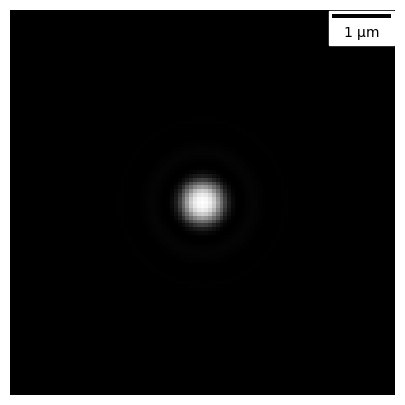

In [7]:
my_kernel = PSF_generator(
    radius = 50, 
    wavelength = 0.75, 
    NA = 1.0, 
    n = 1.4, 
    resize_amount = 1, 
    pix_mic_conv = 0.065, 
    apo_sigma = 8, 
    mode="simple fluo", 
    condenser = "Ph3",
    offset = 0
)
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

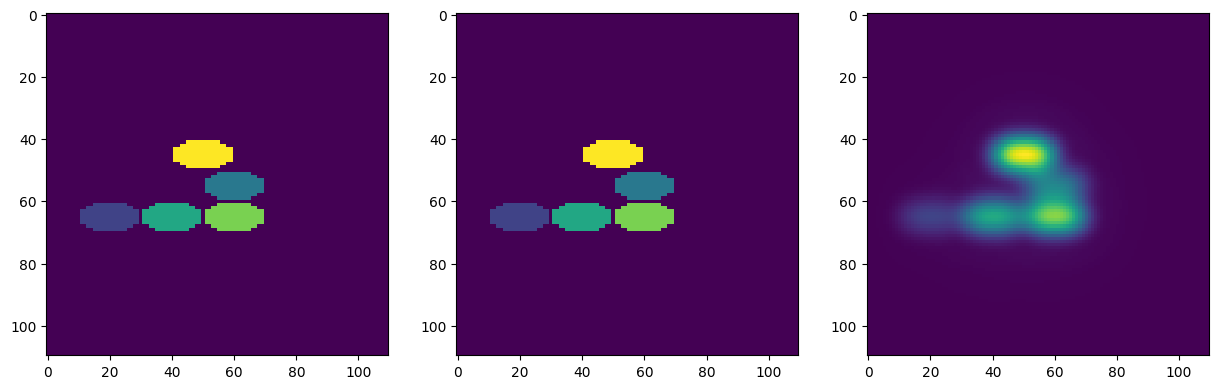

In [8]:
WIDTH = 110
HEIGHT = 110

original = np.zeros((WIDTH,HEIGHT))
mask = np.zeros((WIDTH,HEIGHT))

selectedPts = [[60,10],[50,50],[60,30],[60,50],[40,40]]#,[50,25]]#,[50,75],[40,60],[40,80],[40,20]]
w = 5
h = 10
for i,(x,y) in enumerate(selectedPts):
    #Draw a circle centred aobut the point
    for j in range(2*w):
        for k in range(2*h):
            if ((j-w)/w)**2 + ((k-h)/h)**2 < 1:
                original[x+j,y+k] = ((i+1)/(len(selectedPts)))
                mask[x+j,y+k] = (i+1)/len(selectedPts)

my_renderer = SimplifiedRenderer(original,my_kernel)
output = my_renderer.render_scene()

f, axarr = plt.subplots(1,3)
axarr[0].imshow(original)
axarr[1].imshow(mask)
axarr[2].imshow(output)
plt.show()

/home/boomalope/symbac/symbac/tests/dx_test_env/../../SyMBac/PSF.py:178: RuntimeWarning: invalid value encountered in divide
  PSF = (2 * jv(1, rr) / (rr)) ** 2


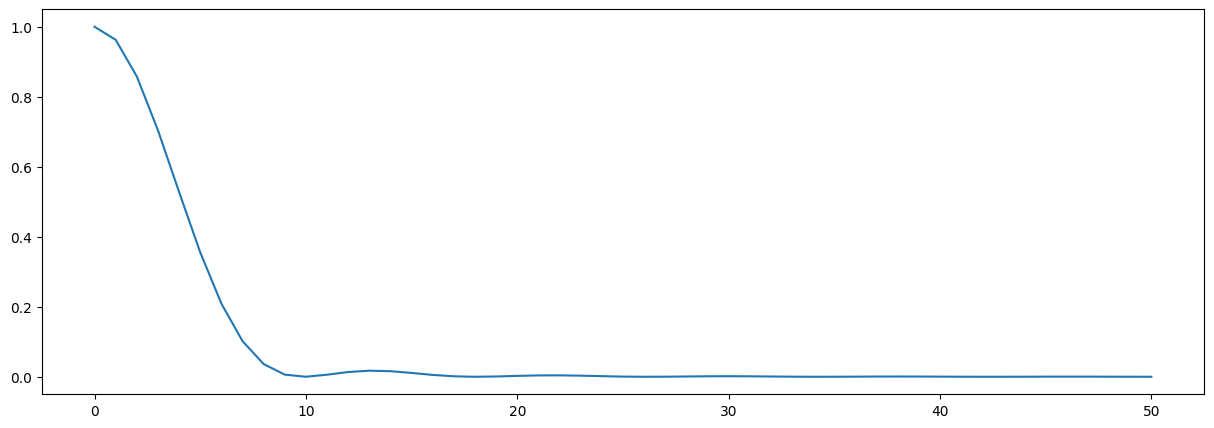

In [9]:
psf = my_kernel.get_fluorescence_kernel(my_kernel.wavelength,my_kernel.NA,my_kernel.n,my_kernel.radius,my_kernel.scale)    
size = psf.shape[1]
central_psf = psf[psf.shape[1]//2]
central_psf = central_psf[len(central_psf)//2:]
plt.plot(central_psf)
with open('psf.pkl', 'wb') as file: 
    pickle.dump(central_psf, file)

In [10]:
with open('ori.pkl', 'wb') as file: 
    pickle.dump(original, file)
with open('mask.pkl', 'wb') as file: 
    pickle.dump(mask, file)
with open('out.pkl', 'wb') as file: 
    pickle.dump(output, file)
with open('psf.pkl', 'wb') as file: 
    pickle.dump(psf, file)